In [13]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Python Library Imports


In [0]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics
%matplotlib inline
from scipy.spatial.distance import euclidean as L2_distance
from scipy.spatial.distance import cityblock as L1_distance
from scipy.spatial.distance import chebyshev as L_Inf_dist
from scipy.spatial.distance import cdist 
from scipy import spatial
from scipy import stats as st
import operator as op
from collections import Counter

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data(path="mnist.npz")

In [65]:
x_train.shape

(60000, 28, 28)

Simlpe data validation.

# Handwritten Digits Recognition with kNN

We make use of the KDTree data structure to accelerate kNN search.

In [0]:
# Flattening data to 1-D vector
train = x_train.flatten().reshape(60000, 784)
test  = x_test.flatten().reshape(10000, 784)

# List of K neighbors 
k_list =[1,3,5,10,20,30,40,50,60]

# KDTree allows us to quickly find the nearest neighbor vectors in train
KDTree = spatial.KDTree(train)

In [67]:
y_train[KDTree.query(test[0],k=1)[1]]

7

*

/usr/local/lib/python3.6/dist-packages/scipy/spatial/kdtree.py:388: RuntimeWarning: overflow encountered in ubyte_scalars
  sd[node.split_dim] = np.abs(node.split-x[node.split_dim])**p


*********K=  1 : Acc= 0.5292
**********K=  3 : Acc= 0.5604
**********K=  5 : Acc= 0.5807
**********K=  10 : Acc= 0.5925
**********K=  20 : Acc= 0.609
**********K=  30 : Acc= 0.6068
**********K=  40 : Acc= 0.6098
**********K=  50 : Acc= 0.6081
**********K=  60 : Acc= 0.6099


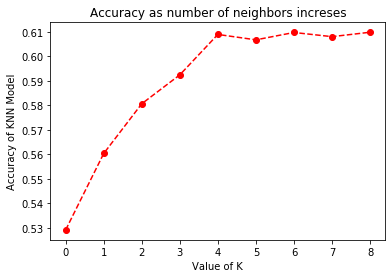

In [68]:
def predict(v_test,k):
  if k==1:
    return y_train[KDTree.query(v_test,k=1)[1]]
  else:  
    return Counter(op.itemgetter(*KDTree.query(v_test,k=k)[1])(y_train)).most_common()[0][0]

def accuracy(k):
  c=0
  for i in range(10000):
    c += int(predict(test[i],k) == y_test[i])
    if i % 1000 == 0:
      print('*',end='')
  return c/10000

accuracy_table = []

for k in k_list:
  acc = accuracy(k)
  accuracy_table.append(acc)
  print('K= ',k,': Acc=',acc)

plt.plot(accuracy_table,'--ro')
plt.xlabel('Value of K')
plt.ylabel('Accuracy of KNN Model')
plt.title('Accuracy as number of neighbors increases')
plt.show()



*   The accuracy reaches a plateau of 60% for K > 10
*   The curse of dimensionality and the use of pixel embedding as vector representation are two challenges for this task.




# K-Means Clustering

In [69]:
path = '/content/drive/My Drive/ASU/2019 FALL/CSE575 SML/CSE575-HW03-Data.csv'
data = pd.read_csv(path,header=None)
# Replace missing data with mean
data = data.fillna(data.mean())
data['13'] = 0
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,92.9894,-9.6430,-4.6412,-6.8569,-5.2263,-4.9604,2.3191,-0.4579,0.5685,1.8047,2.6274,5.2223,6.5404,0
1,73.4054,6.5269,-6.6736,0.5054,-4.4818,-5.1157,-6.3784,1.6296,-3.3999,0.0652,-2.5042,1.7626,-1.0612,0
2,94.6334,-4.5986,-12.4970,-6.3137,-6.7072,-7.4690,-6.7463,-3.6960,-3.4587,-1.4178,-1.3265,1.8756,0.6391,0
3,89.1135,-2.2287,0.2304,-2.7300,-0.9133,-1.9530,-1.0086,0.1486,2.0624,1.1938,-1.0113,0.1567,-1.2346,0
4,76.1929,2.5222,9.1796,4.3947,6.6885,4.0074,1.9488,2.2791,-0.2567,2.8208,-2.9867,-3.6861,-2.2471,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,86.5598,-4.0067,0.7036,1.3357,-6.9007,0.8063,-0.4726,-0.2890,-1.3798,3.1221,-2.5924,1.8249,-6.1399,0
124,83.8025,-3.4814,3.5016,-0.2959,-7.0385,2.3506,-3.7101,3.5613,-1.5063,3.9646,0.3750,0.8998,-1.9977,0
125,79.5542,-3.4625,-1.1868,2.6972,-6.5663,2.2622,-2.6907,3.2315,-3.5141,0.4649,-3.1912,0.9381,-3.8443,0
126,84.3496,-2.7338,-1.3004,2.2604,-6.9315,0.1138,-3.1434,1.6895,-3.1004,2.2891,0.2254,2.0268,-1.5204,0


We use the L2 (Euclidean) distance.

In [70]:
L2_distance(data.loc[0], data.loc[1])

29.97960336495465

A brief look at our data 

In [71]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.0
mean,83.683898,-2.195287,-0.065332,-0.400176,-4.142655,-1.678232,-2.343592,-0.606704,-1.415199,0.062480,0.453668,0.304716,0.416184,0.0
std,9.283589,3.819155,3.431120,3.098598,3.989790,3.038984,2.726302,2.540718,2.512389,2.509116,2.915914,2.725308,3.106148,0.0
min,57.493500,-16.316400,-12.497000,-7.940200,-17.677100,-10.261800,-11.640400,-8.206300,-9.130300,-5.785700,-5.469700,-5.560700,-7.189500,0.0
25%,77.382550,-4.129750,-2.174550,-2.515425,-6.097950,-3.647950,-3.616775,-2.345425,-3.104600,-1.635775,-1.582050,-1.538050,-1.479000,0.0
50%,84.076050,-2.470700,-0.328300,-0.316050,-3.994750,-1.262200,-2.331950,-0.566800,-1.560400,-0.080650,0.297350,0.149550,0.297850,0.0
75%,90.419075,-0.097050,2.369550,1.869675,-1.531775,0.477950,-0.456650,1.592550,0.381500,1.707325,2.203650,1.995450,2.501850,0.0
max,100.458200,10.706700,9.179600,9.303400,6.688500,5.007200,3.013700,4.508100,5.649400,9.617700,10.805100,9.248200,9.244300,0.0


Statistical description of our dataset.

---
A 2D plot of the 0 and 1 features below.


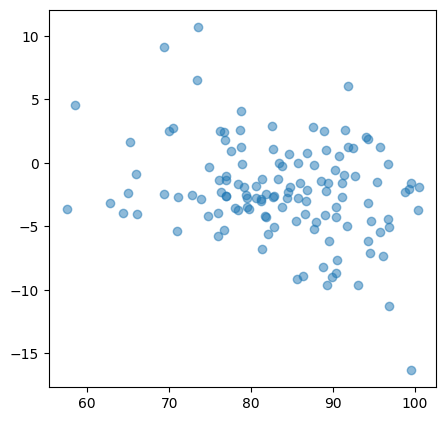

In [72]:
 plt.figure(figsize=(5, 5), dpi=100)
 plt.scatter(data[0],data[1],cmap='bwr',alpha=0.5)

K-Means implementation:

In [0]:
n_data = data.values.tolist()
def KMeans(data,k):
  means = [data.sample().values.tolist()[0][:13] for _ in range(0,k)]
  temp = 0
  while means != temp:
    temp = means
    for x in n_data: x[13] = np.argmin([L2_distance(x[:13], m) for m in means])
    means = pd.DataFrame(n_data).groupby(13).mean().values.tolist()
  obj_f = sum([L2_distance(x[:13], means[x[13]])**2 for x in n_data])
  return means,obj_f

The algorithm converges fast and exactly.

In [135]:
pd.DataFrame(means)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,76.008056,-1.101587,1.087281,0.21184,-3.089397,-0.895835,-1.853671,0.021103,-1.514394,-0.226921,0.149911,-0.495998,0.056776
1,90.894536,-3.222702,-1.148089,-0.97510,-5.132080,-2.413211,-2.803821,-1.196462,-1.322017,0.334342,0.739015,1.056902,0.753811


Objective function 17488.957285790137


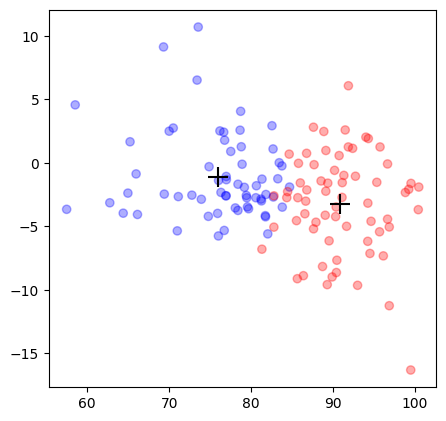

In [81]:
means,obj_f = KMeans(data,2)
plt.figure(figsize=(5, 5), dpi=100)
result = pd.DataFrame(np.array(n_data))
plt.scatter(result[0],result[1],c=result[13],cmap='bwr',alpha=0.32)
dmeans = pd.DataFrame(means)
plt.scatter(dmeans[0], dmeans[1], c='black', marker='+', s=200)
print('Objective function',obj_f)

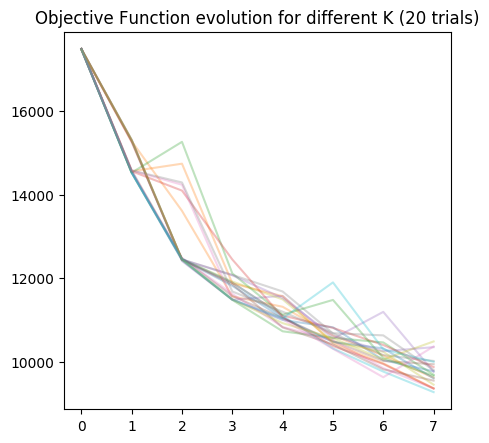

In [75]:
k_list = [2,3,4,5,6,7,8,9]
plt.figure(figsize=(5, 5), dpi=100)
for _ in range(20):
  objective = [KMeans(data,k)[1] for k in k_list]
  plt.plot(objective,alpha=0.3)
plt.title('Objective Function evolution for different K (20 trials)')
plt.show()

# Gaussian Mixture Model

We initialise the location parameter using the means from K-Means.

In [87]:
m_df = pd.DataFrame(means)
m_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,76.008056,-1.101587,1.087281,0.21184,-3.089397,-0.895835,-1.853671,0.021103,-1.514394,-0.226921,0.149911,-0.495998,0.056776
1,90.894536,-3.222702,-1.148089,-0.97510,-5.132080,-2.413211,-2.803821,-1.196462,-1.322017,0.334342,0.739015,1.056902,0.753811


We then calculate the scale parameter from the sample data.

In [90]:
s_df = result.groupby(13).std()
s_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
13,,,,,,,,,,,,,
0.0,6.323776,3.362280,3.235204,2.778304,2.935945,2.288767,2.138262,2.482101,2.330266,2.045506,2.198004,2.169078,1.924336
1.0,4.676605,3.959378,3.274413,3.289776,4.578281,3.463540,3.128511,2.470171,2.686761,2.866917,3.450809,2.985030,3.890613


Calculate the probabilities according to the EM algorithm.

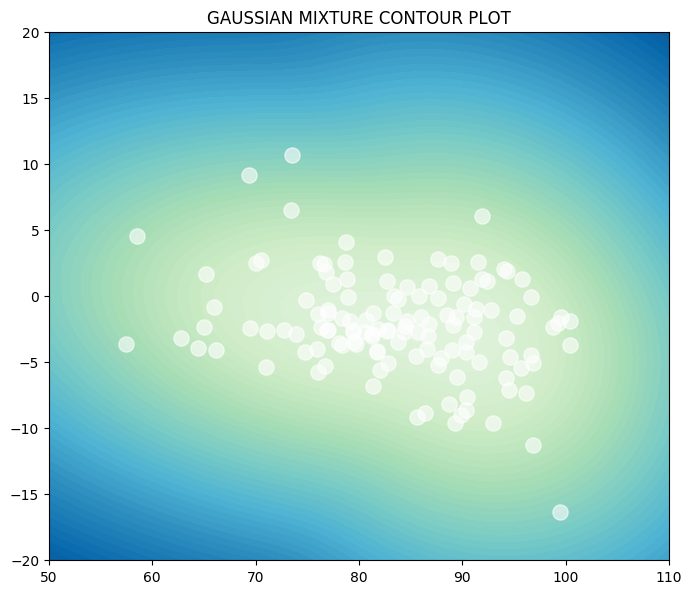

In [318]:
from sklearn import mixture
from matplotlib.colors import LogNorm

X_train = np.array([data[0],data[1]]).T
clf = mixture.GaussianMixture(n_components=2)
clf.fit(X_train)

x = np.linspace(50, 110, 50)
y = np.linspace(-20, 20, 40)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)
plt.figure(figsize=(8, 7), dpi=100)
plt.title('GAUSSIAN MIXTURE CONTOUR PLOT')
plt.contourf(X, Y, Z, 200, norm=LogNorm(vmin=4, vmax=40),levels=np.logspace(0, 1.6, 100),cmap='GnBu')
plt.scatter(X_train[:, 0], X_train[:, 1],color='white',marker='o',s=120,alpha=0.6)

# An Alternative to K-Means

### In this version we use the L1 norm which results in the K-Medians algorithm.


In [0]:
def KMedians(data,k):
  medians = [data.sample().values.tolist()[0][:13] for _ in range(0,k)]
  temp = 0
  while medians != temp:
    temp = medians
    num,denum = 0
    for x in n_data:
      x[13] = np.argmin([L2_distance(x[:13], m) for m in medians])
      num += xmedians[x[13]]
    medians = pd.DataFrame(n_data).groupby(13).mean().values.tolist()
    for m in medians:

  obj_f = sum([L2_distance(x[:13], medians[x[13]])**2 for x in n_data])
  return medians,obj_f

Objective function 17479.03470282119


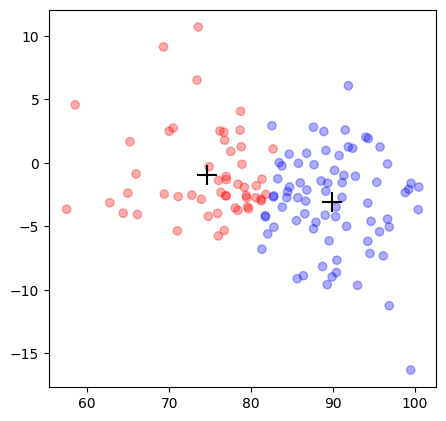

In [140]:
C,obj_f = KMedians(data,2)
plt.figure(figsize=(5, 5), dpi=100)
result = pd.DataFrame(np.array(n_data))
plt.scatter(result[0],result[1],c=result[13],cmap='bwr',alpha=0.32)
dC = pd.DataFrame(C)
plt.scatter(dC[0], dC[1], c='black', marker='+', s=200)
print('Objective function',obj_f)

In [141]:
pd.DataFrame(C)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,89.851909,-3.069601,-1.077288,-1.003132,-4.859582,-2.283916,-2.610768,-1.067761,-1.306750,0.402086,0.808429,0.823130,0.594442
1,74.669112,-0.917442,1.413681,0.481067,-3.094840,-0.793002,-1.953104,0.067148,-1.573702,-0.433865,-0.064829,-0.452967,0.155654


### We try using L∞ (The Chebychev maximum norm) we name it K-Modes


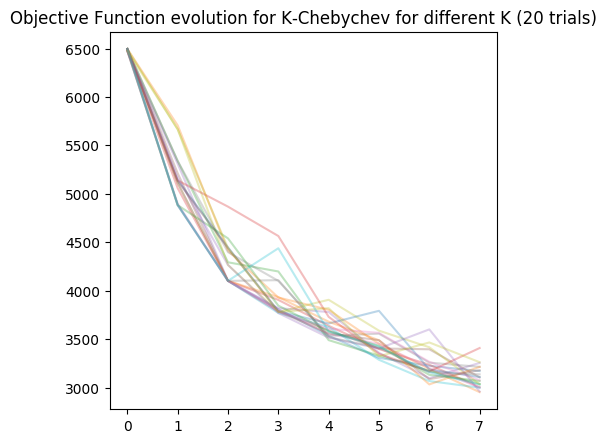

In [267]:
def K_Modes(data,k):
  n_data = data.values.tolist()
  means = [data.sample().values.tolist()[0][:13] for _ in range(0,k)]
  temp = 0
  while means != temp:
    temp = means
    for x in n_data: x[13] = np.argmin([L_Inf_dist(x[:13], m) for m in means])
    means = pd.DataFrame(n_data).groupby(13).mean().values.tolist()
  obj_f = sum([L_Inf_dist(x[:13], means[x[13]])**2 for x in n_data])
  return means,obj_f

k_list = [2,3,4,5,6,7,8,9]
plt.figure(figsize=(5, 5), dpi=100)
for _ in range(20):
  objective = [K_Modes(data,k)[1] for k in k_list]
  plt.plot(objective,alpha=0.3)
plt.title('Objective Function evolution for K-Modes for different K (20 trials)')
plt.show() 

We observe that the max norm leads to lower values 

Objective function 6496.220617736068


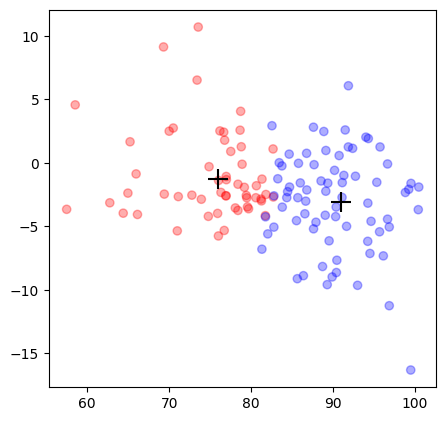

In [268]:
means,obj_f = K_Chebychev(data,2)
plt.figure(figsize=(5, 5), dpi=100)
result = pd.DataFrame(np.array(n_data))
plt.scatter(result[0],result[1],c=result[13],cmap='bwr',alpha=0.32)
dmeans = pd.DataFrame(means)
plt.scatter(dmeans[0], dmeans[1], c='black', marker='+', s=200)
print('Objective function',obj_f)

The 2D k=2 case leads to almost identical result.

#THANK YOU!